In [106]:
import numpy as np
import pandas as pd

In [107]:
fe_boru=pd.read_csv('rlogm.csv')

In [108]:
fe_boru.outcome.value_counts()

1    342
0     23
Name: outcome, dtype: int64

In [109]:
fe_boru.head()

,outcome,GUCA2B,GLP2R,SCGN,SLC4A4,CHGA,CA2,GCNT2,PLP1,PYY,...,SLC6A6,KLHL35,CLDN1,TMEM41A,KRT80,ENC1,FUT1,CPNE7,LOC101929705,PVT1
0,1,3.483811,4.289562,3.483811,9.663349,2.728289,13.150235,5.241898,3.167633,4.682944,...,10.638202,10.076636,11.167618,10.322602,8.911916,12.416233,7.463775,7.732479,7.361796,8.929841
1,1,3.028479,4.841397,3.558573,4.598555,6.268542,8.700087,3.558573,1.575079,1.575079,...,11.614465,6.405605,11.953198,10.506868,9.473243,12.490119,7.306226,10.746634,4.530656,8.915182
2,1,1.575079,4.378980,5.074619,7.176323,8.222497,8.555890,5.128507,4.548423,5.074619,...,11.661348,10.177288,12.367212,10.437764,10.892734,12.635989,6.588569,10.014615,4.378980,8.957878
3,1,4.140259,3.957543,3.175671,8.795550,5.821300,11.771064,4.805708,3.957543,2.734371,...,10.628456,8.107865,10.828497,10.261880,8.446872,12.108006,8.927701,10.528911,6.509506,8.734984
4,1,1.575079,2.714801,1.575079,7.918205,1.575079,5.457548,3.149788,4.185849,2.568247,...,10.652180,6.737754,11.966410,9.264339,8.530122,12.599954,8.307432,11.565549,5.639267,10.087947


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import smote


## PCA

In [23]:
#pca
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=fe_boru.drop('outcome', axis=1)
scaler.fit(df)
scaled_data=scaler.transform(df)

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [25]:
t=np.asarray(fe_boru.outcome)
t=t.astype(object)

In [26]:
for i in range(len(t)):
    if t[i]==1:
        t[i]='cancer'
    else:
        t[i]='non-cancer'
    

In [27]:
pc_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
pc_df['cluster']=t


In [28]:
scaled_data.shape

(365, 47)

In [29]:
x_pca.shape

(365, 5)

In [30]:
var= pca.explained_variance_ratio_

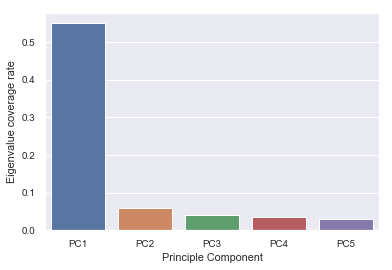

In [31]:
ex =pd.DataFrame({'Eigenvalue coverage rate':var,'Principle Component':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='Principle Component',y='Eigenvalue coverage rate',data=ex)

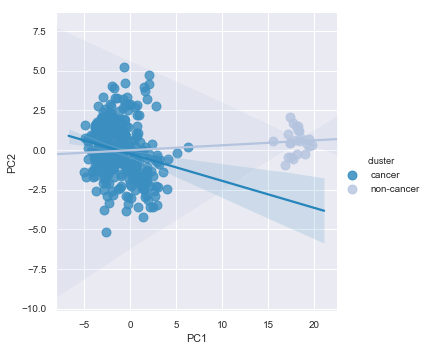

In [32]:
sns.lmplot(x='PC1',y='PC2', data=pc_df,hue='cluster',legend=True, palette='PuBu_r',
scatter_kws={"s": 80})

In [33]:
df_com = pd.DataFrame(pca.components_[0:2,:], columns=df.columns)

In [35]:
pd.set_option("display.max_rows", 109)
df_com.T

,0,1
GUCA2B,0.174952,-0.204236
GLP2R,0.173696,0.094846
SCGN,0.173881,0.042787
SLC4A4,0.159081,-0.128422
CHGA,0.163863,-0.148749
CA2,0.166791,-0.166506
GCNT2,0.174305,0.069297
PLP1,0.171075,0.158261
PYY,0.171285,-0.187734
CA1,0.167450,-0.187462


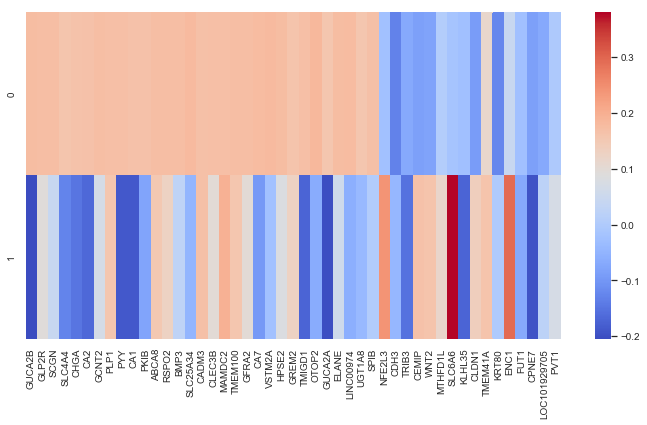

In [34]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_com,cmap="coolwarm")

## the ML methods part

In [111]:
X0=fe_boru[fe_boru['outcome']==0]
#X0=X0.reindex(np.random.permutation(X0.index))

In [112]:
X1=fe_boru[fe_boru['outcome']==1]
#X1=X1.reindex(np.random.permutation(X1.index))

In [113]:
X00=X0.drop('outcome',axis=1)
y00=X0['outcome']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X00, y00, 
                                                    test_size=0.33, 
                                                    random_state=101)

In [114]:
X11=X1.drop('outcome',axis=1)
y11=X1['outcome']
X_train0, X_test0, y_train0, y_test0 = train_test_split(X11, y11, 
                                                    test_size=0.33, 
                                                    random_state=101)

In [115]:
X_train=X_train1.append(pd.DataFrame(data=X_train0))
X_test=X_test1.append(pd.DataFrame(data=X_test0))
y_train=np.concatenate([y_train1,y_train0])
y_test=np.concatenate([y_test1,y_test0])

# testing with the imbalanced dataset

In [86]:
fe_boru=fe_boru.reindex(np.random.permutation(fe_boru.index))
X = fe_boru.drop('outcome', axis=1)
y=fe_boru['outcome']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [116]:
from collections import Counter
print(sorted(Counter(y_test).items()))


[(0, 8), (1, 113)]


In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [118]:
pred_test=rf.predict(X_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
print(classification_report(y_test,pred_test))
print('\n')
print(confusion_matrix(y_test,pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       121



[[  8   0]
 [  0 113]]


In [121]:
print(rf.feature_importances_)
feature_imp = pd.Series(rf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[0.05 0.   0.05 0.   0.   0.   0.   0.05 0.05 0.   0.05 0.1  0.   0.
 0.   0.05 0.   0.05 0.   0.   0.   0.1  0.   0.05 0.05 0.05 0.05 0.05
 0.   0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.
 0.   0.   0.   0.   0.  ]


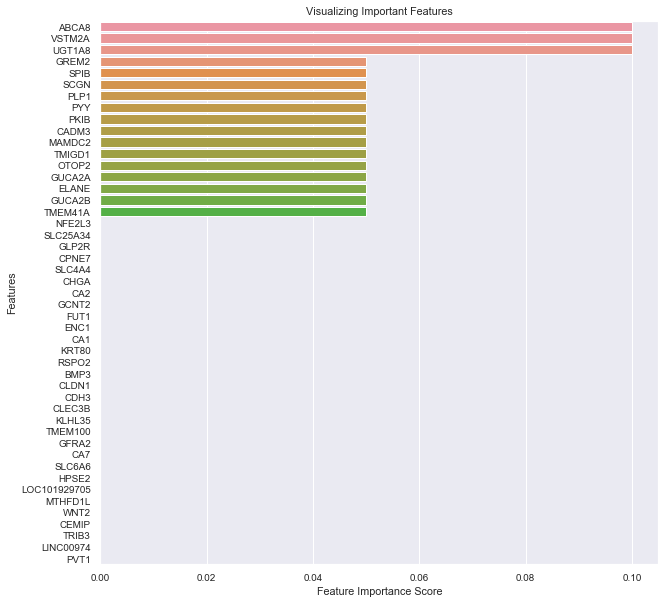

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
plt.savefig('importance ranking for female')
plt.close()


In [123]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=101).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

C:\Users\User\Anaconda3\lib\site-packages\eli5\formatters\html.py:234: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,CA2
0 ± 0.0000,CA7
0 ± 0.0000,GFRA2
0 ± 0.0000,TMEM100
0 ± 0.0000,MAMDC2
0 ± 0.0000,CLEC3B
0 ± 0.0000,CADM3
0 ± 0.0000,SLC25A34
0 ± 0.0000,BMP3
0 ± 0.0000,HPSE2


## adaboost with regular over sampling

In [124]:
#regular over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 229), (1, 229)]


In [125]:
model = AdaBoostClassifier(n_estimators=100, random_state=101)
model.fit(X_resampled, y_resampled)
y_over = model.predict(X_test)


In [126]:
print(classification_report(y_test, y_over))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       121



In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_over)

array([[  8,   0],
       [  0, 113]], dtype=int64)

1.0


Text(0.5, 0, 'False Positive Rate')

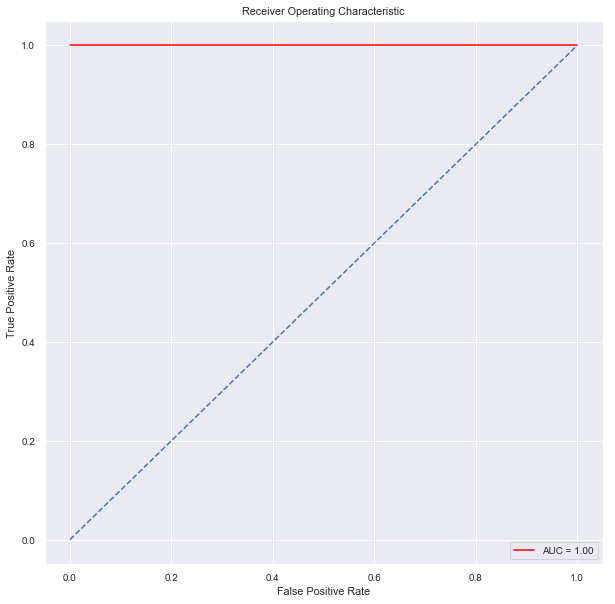

In [128]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_over)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [129]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.1223 ± 0.0162,TMIGD1
0 ± 0.0000,CA7
0 ± 0.0000,GFRA2
0 ± 0.0000,TMEM100
0 ± 0.0000,MAMDC2
0 ± 0.0000,CLEC3B
0 ± 0.0000,CADM3
0 ± 0.0000,SLC25A34
0 ± 0.0000,BMP3
0 ± 0.0000,CA2


In [130]:
X=np.concatenate([X_resampled,X_test])
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

In [131]:
y=np.concatenate([y_resampled,y_test])

Automatically created module for IPython interactive environment
Classification score 1.0 (pvalue : 0.009900990099009901)


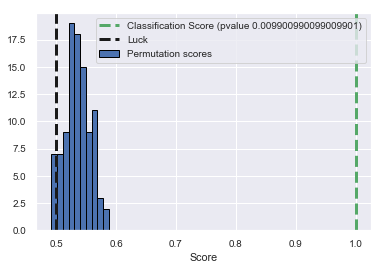

In [104]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
import matplotlib.pyplot as plt
print(__doc__)
n_classes = np.unique(y).size
cv = StratifiedKFold
score, permutation_scores, pvalue = permutation_test_score(rf, X, y,cv=10, scoring="accuracy", n_permutations=100, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))
plt.hist(permutation_scores, 10, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()

plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

In [105]:
 np.unique(y).size

2

## regular over sampling with random forests


In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                               random_state=101)


In [133]:
m2=clf.fit(X_resampled, y_resampled)

In [134]:
y_pred=clf.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       121



In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  8,   0],
       [  0, 113]], dtype=int64)

In [137]:
print(clf.feature_importances_)
feature_imp = pd.Series(clf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[0.02 0.01 0.04 0.02 0.02 0.03 0.04 0.05 0.02 0.04 0.04 0.02 0.02 0.
 0.08 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.01 0.02 0.05 0.   0.04 0.07
 0.04 0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


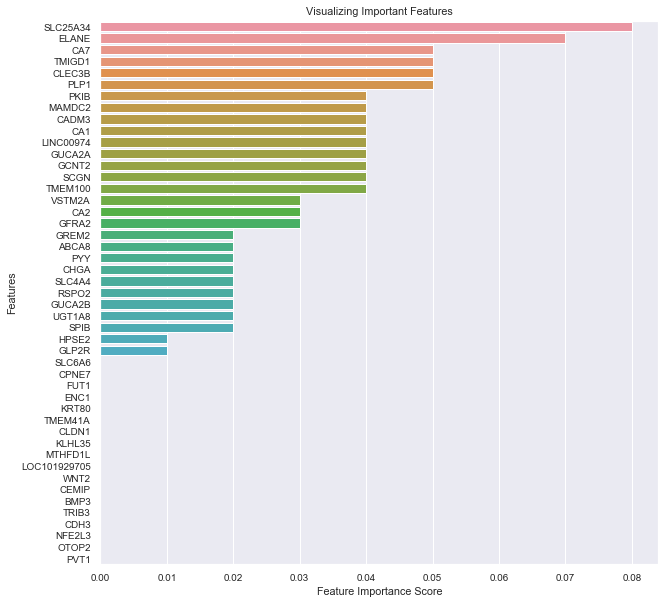

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot

sns_plot=sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)
fig=sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
fig.savefig('importance ranking for male')


In [139]:
perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

C:\Users\User\Anaconda3\lib\site-packages\eli5\formatters\html.py:234: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,CA2
0 ± 0.0000,CA7
0 ± 0.0000,GFRA2
0 ± 0.0000,TMEM100
0 ± 0.0000,MAMDC2
0 ± 0.0000,CLEC3B
0 ± 0.0000,CADM3
0 ± 0.0000,SLC25A34
0 ± 0.0000,BMP3
0 ± 0.0000,HPSE2


## adaboost with SMOTE

In [140]:
# SMOTE
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=101)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))


Original dataset shape Counter({1: 229, 0: 15})
Resampled dataset shape Counter({0: 229, 1: 229})


In [141]:
model = AdaBoostClassifier(n_estimators=100, random_state=101)
m1=model.fit(X_train_sm, y_train_sm)
y_smote = model.predict(X_test)


In [142]:
print(classification_report(y_test, y_smote))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       121



In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_smote)

array([[  8,   0],
       [  0, 113]], dtype=int64)

1.0


Text(0.5, 0, 'False Positive Rate')

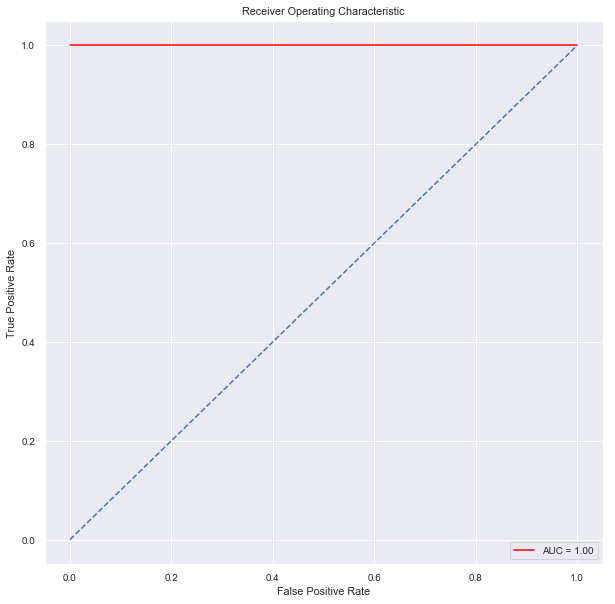

In [144]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [145]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=30).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1157 ± 0.0209,TMIGD1
0 ± 0.0000,CA7
0 ± 0.0000,GFRA2
0 ± 0.0000,TMEM100
0 ± 0.0000,MAMDC2
0 ± 0.0000,CLEC3B
0 ± 0.0000,CADM3
0 ± 0.0000,SLC25A34
0 ± 0.0000,BMP3
0 ± 0.0000,CA2


## RF with SMOTE

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                               random_state=101)
m2=clf.fit(X_train_sm, y_train_sm)

In [148]:
y_pred=clf.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       121



In [150]:
print(clf.feature_importances_)
feature_imp = pd.Series(clf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[0.02 0.01 0.04 0.02 0.02 0.03 0.04 0.05 0.02 0.04 0.04 0.02 0.02 0.
 0.08 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.01 0.02 0.05 0.   0.04 0.07
 0.04 0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  8,   0],
       [  0, 113]], dtype=int64)

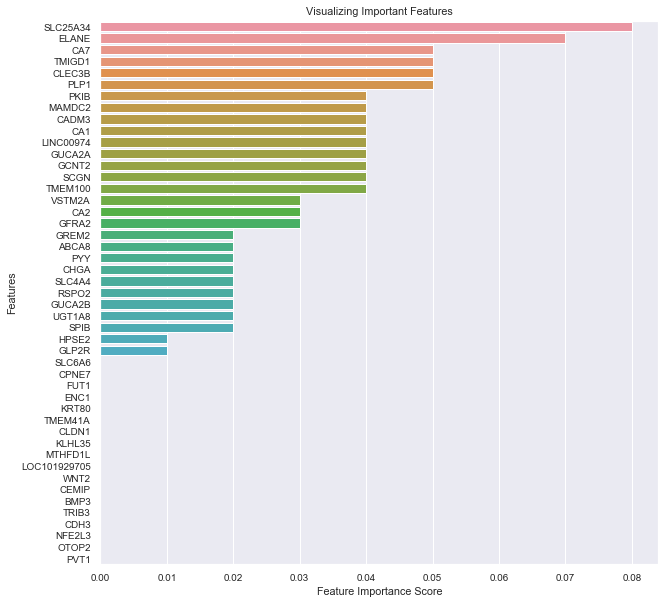

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot

sns_plot=sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)
fig=sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
fig.savefig('importance ranking for male')


1.0


Text(0.5, 0, 'False Positive Rate')

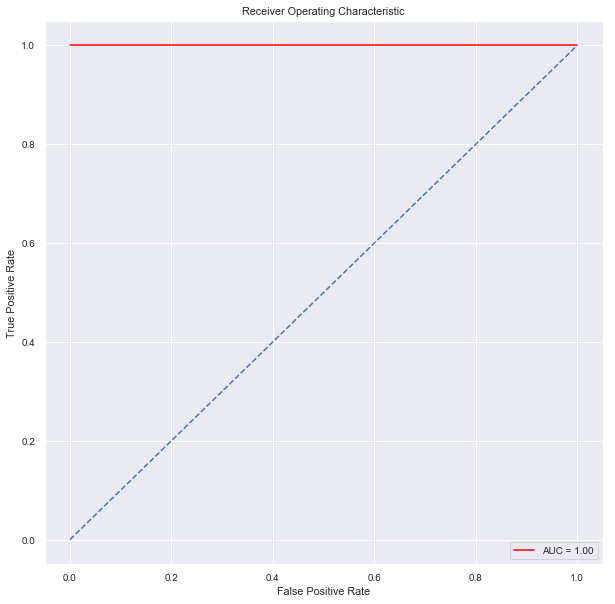

In [153]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [154]:

perm = PermutationImportance(m2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

C:\Users\User\Anaconda3\lib\site-packages\eli5\formatters\html.py:234: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,CA2
0 ± 0.0000,CA7
0 ± 0.0000,GFRA2
0 ± 0.0000,TMEM100
0 ± 0.0000,MAMDC2
0 ± 0.0000,CLEC3B
0 ± 0.0000,CADM3
0 ± 0.0000,SLC25A34
0 ± 0.0000,BMP3
0 ± 0.0000,HPSE2


## smoteboost

In [50]:
target_names = ['No Cancer', 'Cancer']
for algorithm in [smote.SMOTEBoost(n_estimators=50, n_samples=50)]:
    m3=algorithm.fit(X_train, y_train)
    y_predd = model.predict(X_test)
    print()
    print(str(algorithm))
    print()
    print(classification_report(y_test, y_predd,
                                target_names=target_names))


SMOTEBoost(algorithm='SAMME.R', base_estimator=None, k_neighbors=None,
      learning_rate=1.0, n_estimators=50, n_samples=50, random_state=None)

             precision    recall  f1-score   support

  No Cancer       1.00      1.00      1.00         2
     Cancer       1.00      1.00      1.00       119

avg / total       1.00      1.00      1.00       121



In [51]:
confusion_matrix(y_test, y_predd)

array([[  2,   0],
       [  0, 119]], dtype=int64)

In [81]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(m3, random_state=30).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1190 ± 0.0247,TCF21
0 ± 0.0000,BMP3
0 ± 0.0000,NR3C2
0 ± 0.0000,KLHL35
0 ± 0.0000,RSPO2
0 ± 0.0000,ABCA8
0 ± 0.0000,PKIB
0 ± 0.0000,CA1
0 ± 0.0000,SLC6A6
0 ± 0.0000,MTHFD1L


1.0


Text(0.5,0,'False Positive Rate')

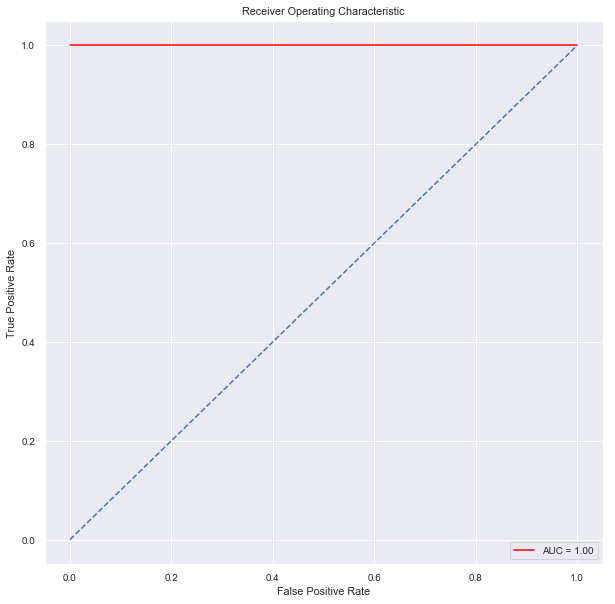

In [121]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predd)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [69]:
list(fe_boru.drop('outcome',axis=1).columns.values)

['ENSG00000079689',
 'ENSG00000142959',
 'ENSG00000065325',
 'ENSG00000183034',
 'ENSG00000168079',
 'ENSG00000152785',
 'ENSG00000182271',
 'ENSG00000170419',
 'ENSG00000108381',
 'ENSG00000125851',
 'ENSG00000160712',
 'ENSG00000163815',
 'ENSG00000187824',
 'ENSG00000139433',
 'ENSG00000108231',
 'ENSG00000164303',
 'ENSG00000186198',
 'ENSG00000162461',
 'ENSG00000131096',
 'ENSG00000168748',
 'ENSG00000143171',
 'ENSG00000185432',
 'ENSG00000102683',
 'ENSG00000171503',
 'ENSG00000172987',
 'ENSG00000138669',
 'ENSG00000080493',
 'ENSG00000168546',
 'ENSG00000240498',
 'ENSG00000147724',
 'ENSG00000156298',
 'ENSG00000141338',
 'ENSG00000226629',
 'ENSG00000245870',
 'ENSG00000111404',
 'ENSG00000187699',
 'ENSG00000198121',
 'ENSG00000115263',
 'ENSG00000135437',
 'ENSG00000182938',
 'ENSG00000196660',
 'ENSG00000125648',
 'ENSG00000166292',
 'ENSG00000232070',
 'ENSG00000197273',
 'ENSG00000123560',
 'ENSG00000269404',
 'ENSG00000162706',
 'ENSG00000067113',
 'ENSG00000167916',


Text(0.5,1,'Visualizing Important Features')

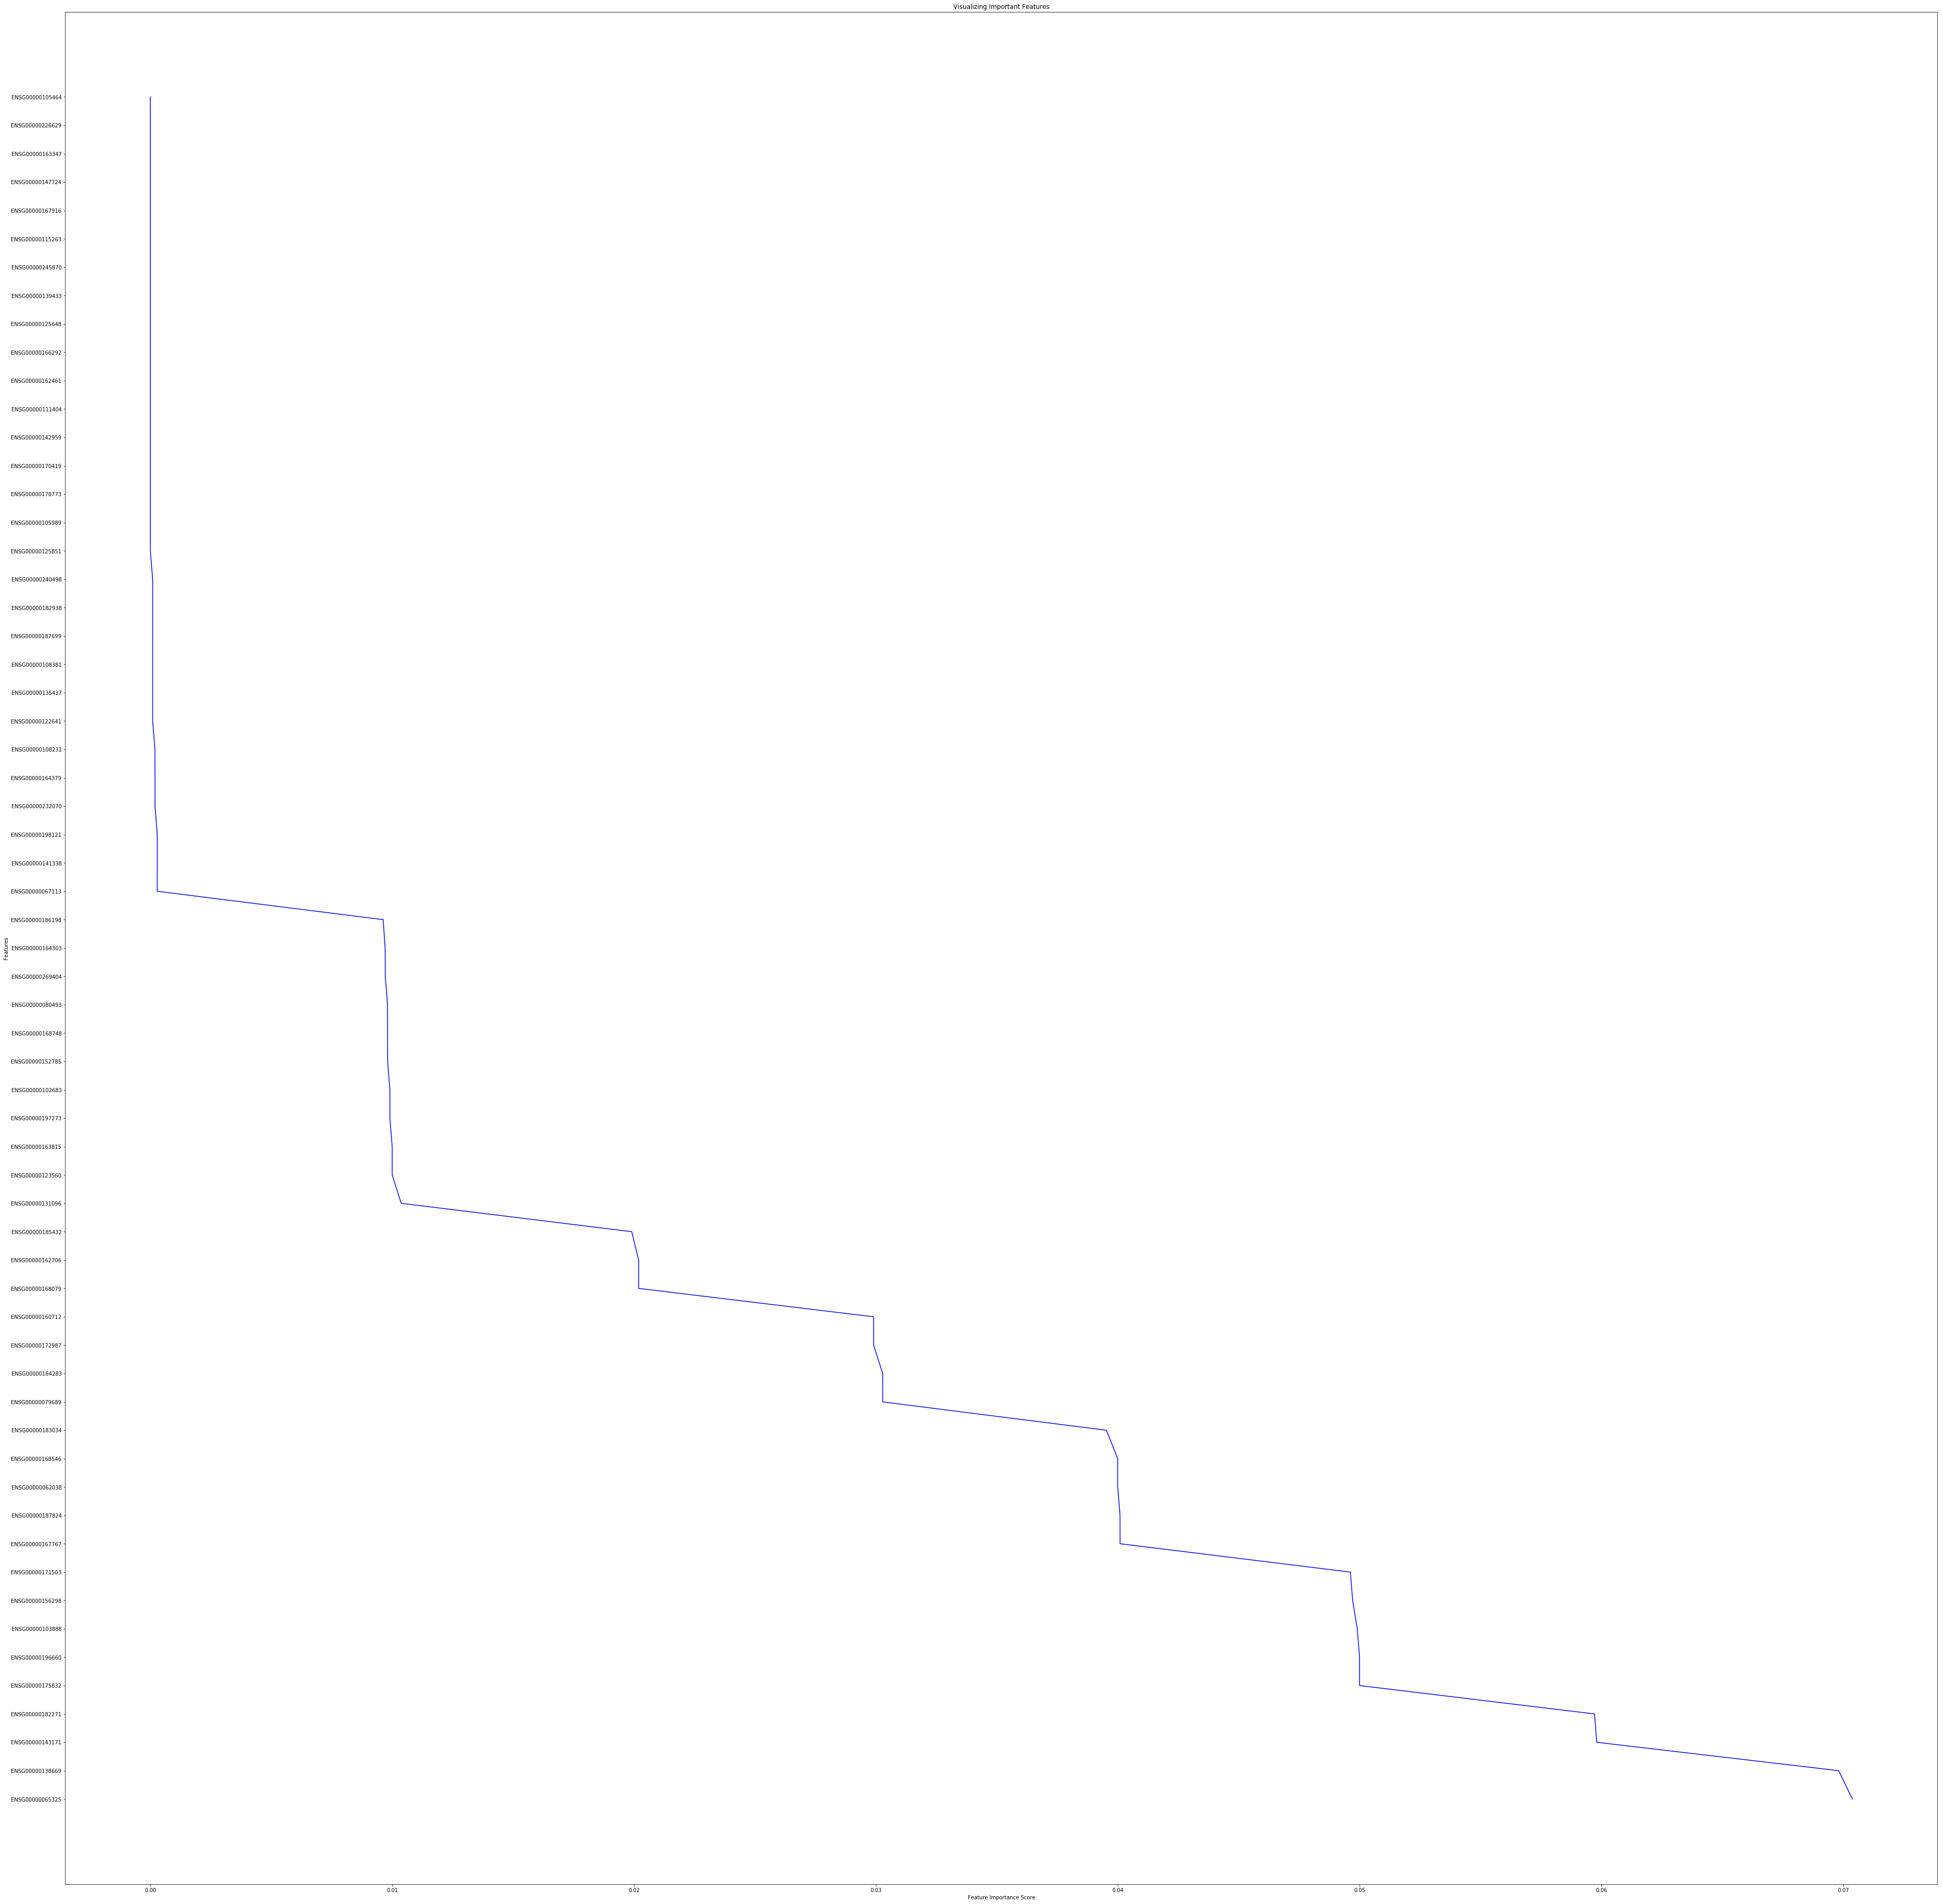

In [72]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 5, 5])
ax.plot(feature_imp, feature_imp.index,'b')
ax.set_xlabel('Feature Importance Score') 
ax.set_ylabel('Features')
ax.set_title("Visualizing Important Features")

In [73]:
help(plot)

NameError: name 'plot' is not defined

In [74]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_baseline)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

NameError: name 'y_baseline' is not defined